In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [37]:
# Importar a Base de dados
tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


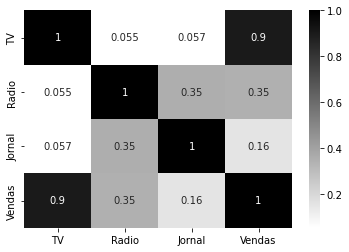

In [38]:
# Análise Exploratória
# Vamos tentar visualizar como as informações de cada item estão distribuídas
# Vamos ver a correlação entre cada um dos itens

sns.heatmap(tabela.corr(), annot=True, cmap="binary")
plt.show()

In [39]:
# Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning
# Separando em dados de treino e dados de teste

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [40]:
# Temos um problema de regressão - Vamos escolher os modelos que vamos usar:
# Regressão Linear
# RandomForest (Árvore de Decisão)

# cria as inteligências aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligências artificias
modelo_regressaolinear.fit(x_train, y_train)
modelo_arvoredecisao.fit(x_train, y_train)

RandomForestRegressor()

In [41]:
# Teste da AI e Avaliação do Melhor Modelo
# Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

# comparar os modelos
print(metrics.r2_score(y_test, previsao_regressaolinear))
print(metrics.r2_score(y_test, previsao_arvoredecisao))  

0.8765384688310575
0.9413667812555501


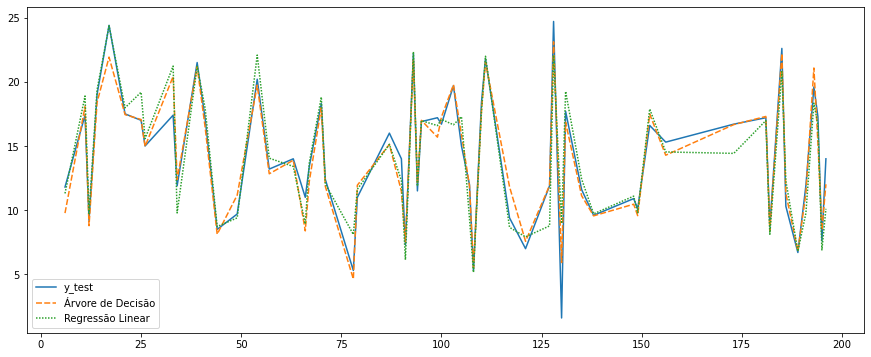

In [45]:
# Visualização Gráfica das Previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_test"] = y_test
tabela_auxiliar["Árvore de Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Regressão Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [48]:
# Como fazer uma nova previsâo?
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.737  8.574 21.132]


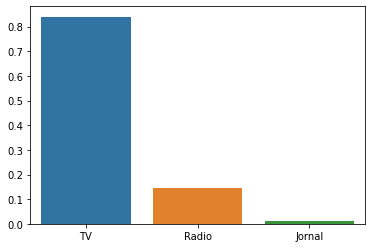

In [49]:
# Qual a importância de cada variável para as vendas?
sns.barplot(x=x_train.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()